**Томилов Матвей, 5130901/20103**

### *Упражнение 8.1.*

В приложении к изученным методическим материалам находится функция, которая принимает на вход параметры M - число элементов в окне и std - стандартное отклонение гауссова распределения.
Она создает прямоугольный сигнал и применяет к нему гауссово окно для заданных M и std. После этого отображает окно после преобразования Фурье и результат применения окна.

Функция plot_filter:


In [24]:
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np
from source_files.thinkdsp import SquareSignal, decorate, zero_pad, Wave

def plot_filter(M=11, std=2):
    signal = SquareSignal(freq=440)
    wave = signal.make_wave(duration=1, framerate=44100)
    spectrum = wave.make_spectrum()

    gaussian = scipy.signal.windows.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)

    ys = np.convolve(wave.ys, gaussian, mode='same')
    smooth =  Wave(ys, framerate=wave.framerate)
    spectrum2 = smooth.make_spectrum()

    # plot the ratio of the original and smoothed spectrum
    amps = spectrum.amps
    amps2 = spectrum2.amps
    ratio = amps2 / amps
    ratio[amps<560] = 0

    # plot the same ratio along with the FFT of the window
    padded =  zero_pad(gaussian, len(wave))
    dft_gaussian = np.fft.rfft(padded)

    plt.plot(np.abs(dft_gaussian), color='gray', label='Gaussian filter')
    plt.plot(ratio, label='amplitude ratio')

    decorate(xlabel='Frequency (Hz)', ylabel='Amplitude ratio')
    plt.show()

Запустим эту функцию, используя слайдер для удобства изменения данных:

In [25]:
from ipywidgets import interact
import ipywidgets as widgets

slider = widgets.IntSlider(min=2, max=100, value=11)
slider2 = widgets.FloatSlider(min=0, max=20, value=2)
interact(plot_filter, M=slider, std=slider2)

interactive(children=(IntSlider(value=11, description='M', min=2), FloatSlider(value=2.0, description='std', m…

<function __main__.plot_filter(M=11, std=2)>

Поэкспериментировав с величинами M и std, мы видим, что при уменьшении std гауссово окно все меньше влияет на выделенный список частот, спадая медленнее, а при увеличении, наоборот, спадает достаточно быстро.

При увеличении std, также, становятся заметнее боковые лепестки, о которых сказано в методических материалах.

Ниже представлены примеры поведения функции для разных значений M и std:


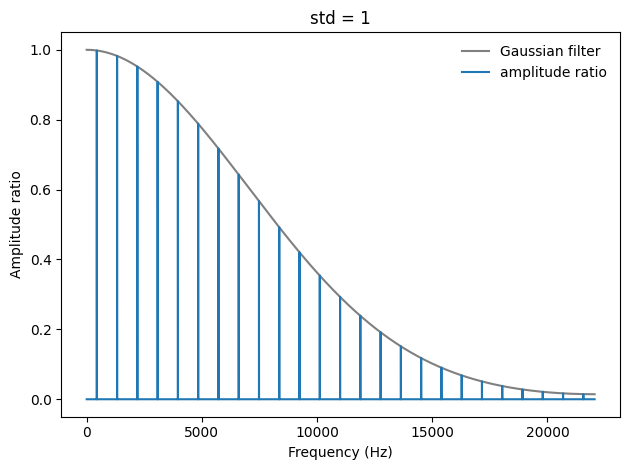

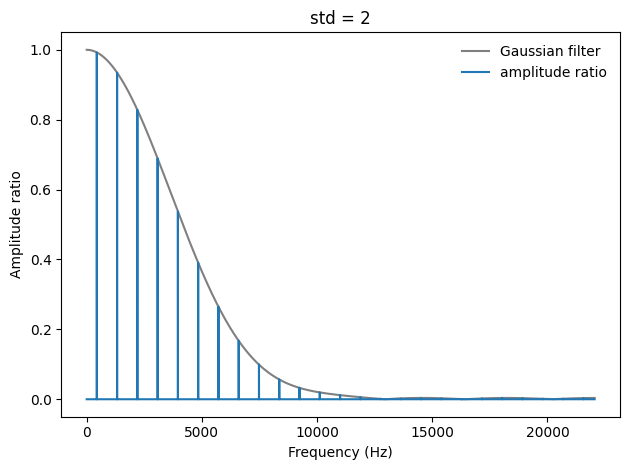

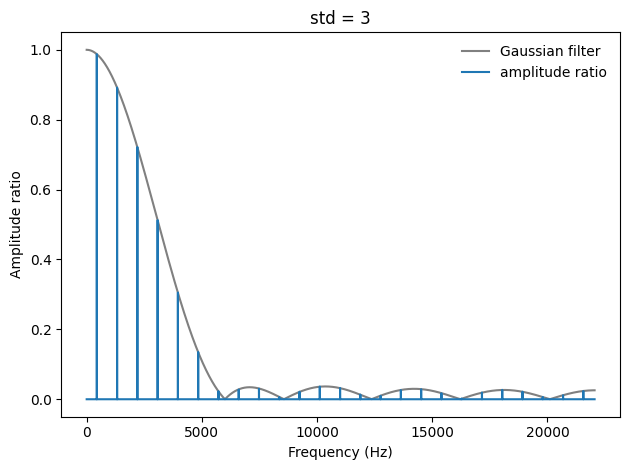

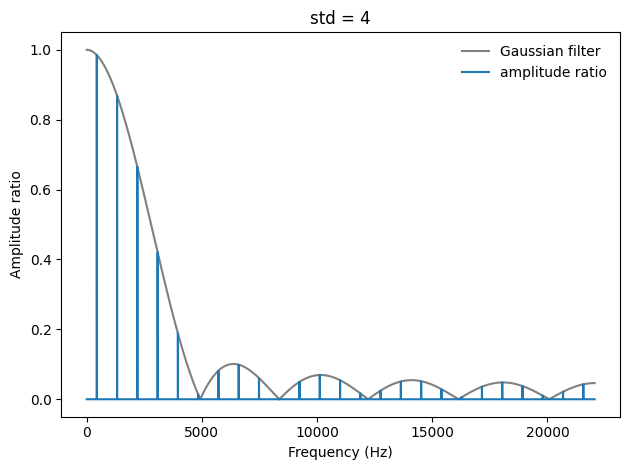

In [26]:
for i in np.arange(1, 5, step=1):
    plt.title(f'std = {i}')
    plot_filter(std=i)

### Упражнение 8.2.

В методических материалах утверждается, что преобразование Фурье гауссовой кривой – также гауссова кривая.

Проверим, что происходит с преобразованием Фурье, если изменяется std, используя *следующую* функцию:

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from source_files.thinkdsp import decorate
import scipy.signal.windows

from ipywidgets import interact
import ipywidgets as widgets

def plot_gaussian(std):
    M = 2 ** 5
    gaussian = scipy.signal.windows.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)

    plt.subplot(1, 2, 1)
    plt.plot(gaussian)
    decorate(xlabel='Time')

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M//2)

    plt.subplot(1, 2, 2)
    plt.plot(np.abs(fft_rolled))
    decorate(xlabel='Frequency')
    plt.show()


Описанная функция создает гауссово окно с переданным значением std, и выводит его на экран. Далее выполняется преобразование Фурье, и получившаяся кривая выводится рядом.

Рассмотрим вывод программы, меняя std слайдером:


In [28]:
slider = widgets.FloatSlider(min=0.1, max=20, value=2)
interact(plot_gaussian, std=slider)

interactive(children=(FloatSlider(value=2.0, description='std', max=20.0, min=0.1), Output()), _dom_classes=('…

<function __main__.plot_gaussian(std)>

Ниже представлены примеры поведения функции для разных значений std:

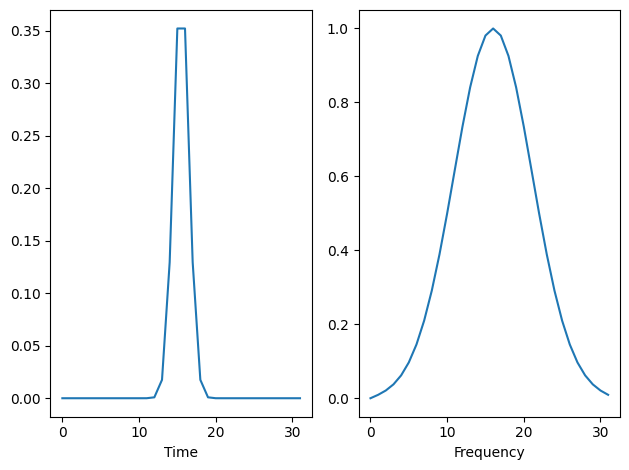

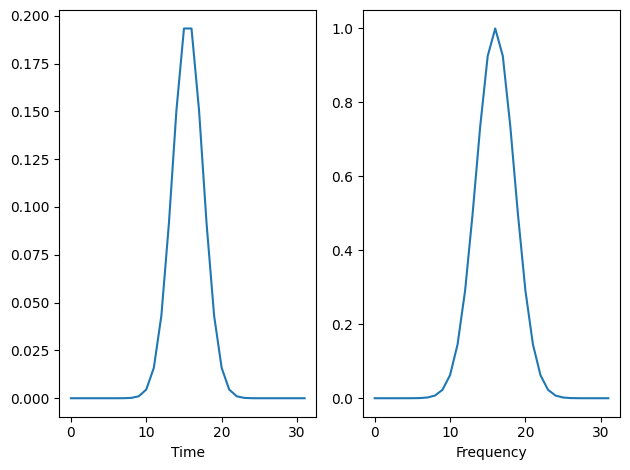

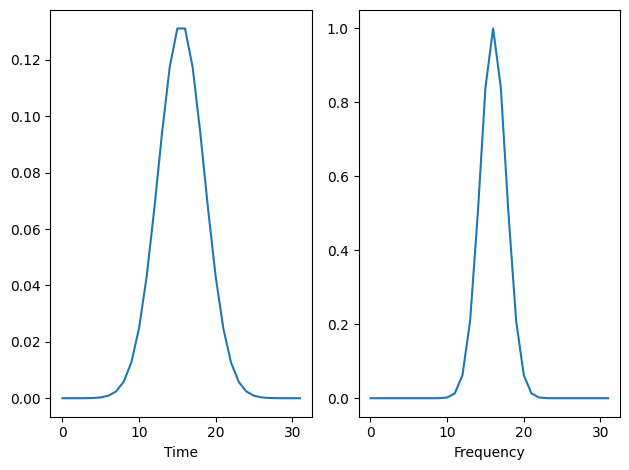

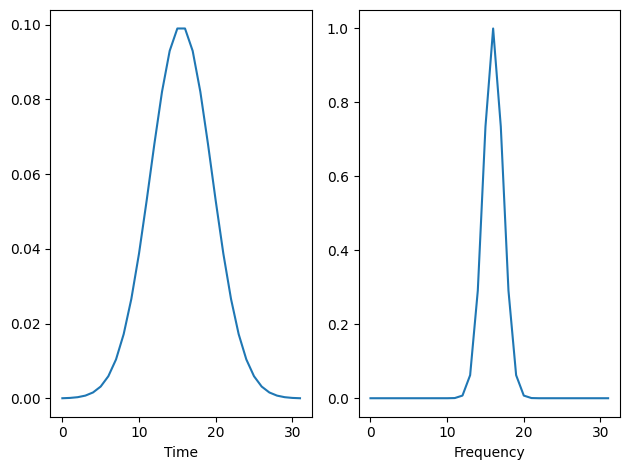

In [29]:
for i in np.arange(1, 5, step=1):
    plot_gaussian(std=i)

После исследования данной функции мы видим, что при увеличении std для гауссовой прямой её версия после преобразования Фурье становится, наоборот, уже.

Это доказывает математика. Гауссова прямая с математическим ожиданием, равным нулю и стандартным отклонением 1⁄a выглядит следующим образом:

f(x)=e^(-ax^2 )

А её преобразование Фурье, так:

F(k)=〖√(π/a) e〗^((-π^2 k^2)⁄a)

У данной Гауссовой прямой стандартное отклонение уже равно a⁄π^2. Следовательно, между этими функциями существует обратная зависимость, которую мы и наблюдаем при изменение параметра std.


### Упражнение 8.3.

В ЛР 3 был изучен ряд оконных функций.
Сейчас нам предстоит глубже изучить и понять эти окна можно с помощью ДПФ.
Для начала создадим окна:


In [30]:
from source_files.thinkdsp import SquareSignal, decorate, zero_pad
import numpy as np
import matplotlib.pyplot as plt
import scipy

M = 15
std = 2.5

gaussian = scipy.signal.windows.gaussian(M=M, std=std)
bartlett = np.bartlett(M)
blackman = np.blackman(M)
hamming = np.hamming(M)
hanning = np.hanning(M)

windows = [blackman, gaussian, hanning, hamming]
names = ['blackman', 'gaussian', 'hanning', 'hamming']

for window in windows:
    window /= sum(window)

Для гауссова окна выбрано такое значение отклонения, чтобы гауссова кривая была похожа на остальные функции из списка.

Получившиеся кривые выведены на экран:


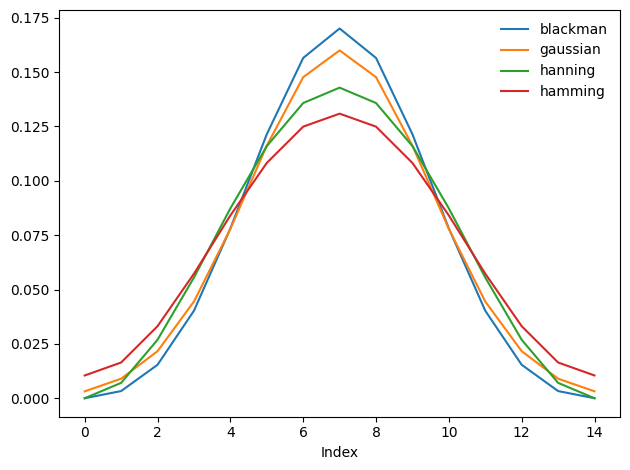

In [31]:
for window, name in zip(windows, names):
    plt.plot(window, label=name)

decorate(xlabel='Index')

Теперь напишем функцию, добавляющую нули к концу оконной функции, и выведем получившееся ДПФ:

In [32]:
def plot_window_dfts(windows, names):
    for window, name in zip(windows, names):
        padded =  zero_pad(window, 44100)
        dft_window = np.fft.rfft(padded)
        plt.plot(abs(dft_window), label=name)

Вызов и результат данной функции приведены ниже:

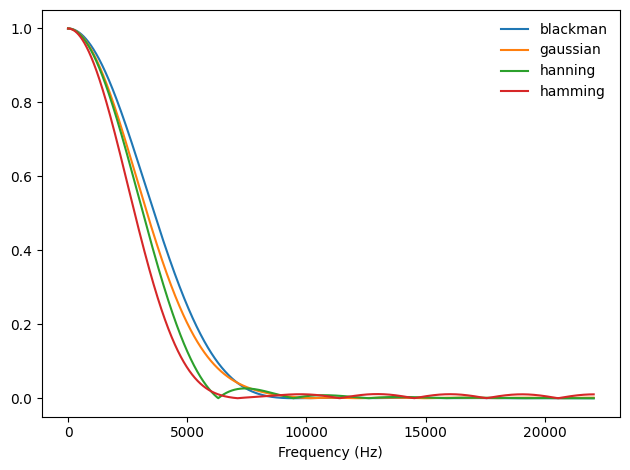

In [33]:
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)')

Функция Хемминга на первый взгляд спадает быстрее всех, однако более точно покажет график с логарифмической шкалой по y.

Такой график представлен ниже:

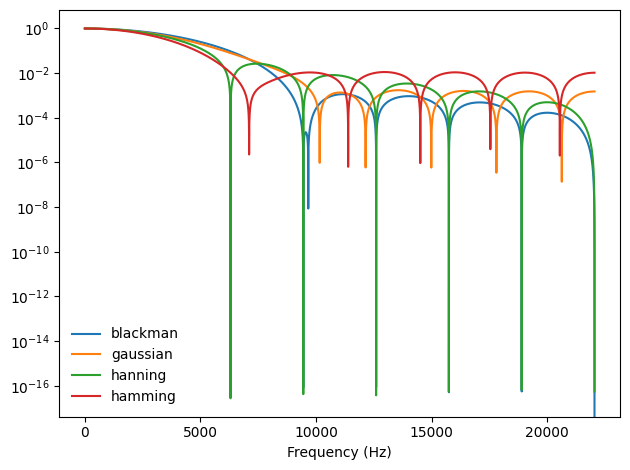

In [34]:
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)', yscale='log')

Теперь мы точно уверены, что функция Хеннинга спадает, не намного, но быстрее всех остальных. И функция Хемминга тоже показала неплохой результат по сравнению с функциями Гаусса и Блекмена.

По графику также отметим, что у окон Хемминга и Гаусса боковые лепестки более устойчивы и не проседают со временем.


Наконец делаем вывод, что функция Хеннинга является наилучшей из всех исследованных т.к. быстро спадает и имеет менее заметные лепестки.
